In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 



In [ ]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_excel('Chapter5_Fracability_DataSet.xlsx')
df

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,13472.772070,466.626844,16.341279,481.414851,0.703538,1
1,9370.348405,577.253950,15.403192,324.750529,0.497242,0
2,10634.130671,439.087333,26.528042,265.034727,0.766302,0
3,18194.375034,309.679533,18.789840,169.480991,1.218154,1
4,18861.977710,614.959877,18.048478,480.189015,1.171049,1
...,...,...,...,...,...,...
995,14903.252156,556.096614,24.546365,618.714490,0.893872,1
996,8484.321767,610.742944,27.099048,452.011635,0.766947,0
997,16738.851347,592.106106,22.497445,589.126276,0.735353,1
998,15993.280544,676.424669,11.714986,304.500834,1.021965,1


In [ ]:
df['Fracability'].iloc[0:651]=None

In [ ]:
df

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,13472.772070,466.626844,16.341279,481.414851,0.703538,NaN
1,9370.348405,577.253950,15.403192,324.750529,0.497242,NaN
2,10634.130671,439.087333,26.528042,265.034727,0.766302,NaN
3,18194.375034,309.679533,18.789840,169.480991,1.218154,NaN
4,18861.977710,614.959877,18.048478,480.189015,1.171049,NaN
...,...,...,...,...,...,...
995,14903.252156,556.096614,24.546365,618.714490,0.893872,1.0
996,8484.321767,610.742944,27.099048,452.011635,0.766947,0.0
997,16738.851347,592.106106,22.497445,589.126276,0.735353,1.0
998,15993.280544,676.424669,11.714986,304.500834,1.021965,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
df2=df.drop(['Fracability'], axis='columns')

In [ ]:
scale=MinMaxScaler()
df_scaled=scale.fit_transform(df2)
df_scaled=pd.DataFrame(df_scaled, columns=['MD_ft', 'Resistivity'	,'YM/PR',	'GR',	'Minimum Horizontal Stress Gradient'])
df_scaled=df_scaled.join(df['Fracability'])

In [ ]:
df_scaled

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,0.477912,0.482407,0.255846,0.768281,0.338214,NaN
1,0.298068,0.596136,0.234836,0.519450,0.168622,NaN
2,0.353470,0.454096,0.483996,0.424603,0.389811,NaN
3,0.684900,0.321060,0.310686,0.272835,0.761269,NaN
4,0.714167,0.634899,0.294082,0.766334,0.722546,NaN
...,...,...,...,...,...,...
995,0.540622,0.574385,0.439613,0.986354,0.494684,1.0
996,0.259226,0.630564,0.496785,0.721579,0.390341,0.0
997,0.621092,0.611405,0.393724,0.939359,0.364369,1.0
998,0.588408,0.698087,0.152232,0.487287,0.599986,1.0


In [ ]:
xun=df.iloc[0:651].drop(['Fracability'], axis='columns')
yun=df['Fracability'].iloc[0:651]


In [ ]:
x=df.iloc[651:].drop(['Fracability'], axis='columns')
y=df['Fracability'].iloc[651:]

In [ ]:
x_trainun, x_testun, y_trainun, y_testun=train_test_split(xun, yun, test_size=0.3)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [ ]:
x_trainun=scale.fit_transform(x_trainun)
x_train=scale.fit_transform(x_train)

x_testun=scale.transform(x_testun)
x_test=scale.transform(x_test)




In [ ]:
model=SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92        44
         1.0       0.92      0.97      0.94        61

    accuracy                           0.93       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.93      0.93      0.93       105



In [ ]:
#using clustering will give opposite results 

from sklearn.cluster import KMeans

dfKM=df.iloc[:651]
dfkm=dfKM.drop(['Fracability'], axis='columns')
dfkmsc=scale.fit_transform(dfkm)
dfkmsc=pd.DataFrame(dfkmsc, columns=dfkm.columns)
dfkmsc

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient
0,0.475430,0.483658,0.263638,0.768281,0.338214
1,0.294730,0.597681,0.241988,0.519450,0.168622
2,0.350396,0.455273,0.498736,0.424603,0.389811
3,0.683402,0.321892,0.320148,0.272835,0.761269
4,0.712808,0.636545,0.303038,0.766334,0.722546
...,...,...,...,...,...
646,0.373726,0.339431,0.373860,0.117972,0.529539
647,0.588798,0.727314,0.402613,0.522068,0.564786
648,0.384896,0.282147,0.357043,0.126285,0.532837
649,0.565328,0.328602,0.900797,0.322334,0.201634


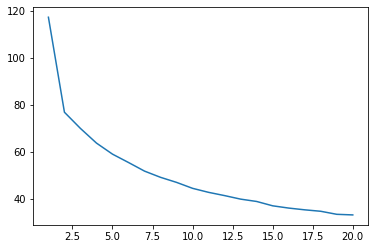

In [ ]:
distortions=[]
for i in range(1,21):
  km=KMeans(i)
  km.fit(dfkmsc)
  distortions.append(km.inertia_)


plt.plot(range(1,21), distortions)


In [ ]:
### so 2 clusters

km=KMeans(2)
km.fit(dfkmsc)
labels=km.labels_
dfkmnor=scale.inverse_transform(dfkmsc)
dfkmnor=pd.DataFrame(dfkmnor, columns=dfkm.columns)
dfkmnor['Clusters']=labels
dfkmnor

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Clusters
0,13472.772070,466.626844,16.341279,481.414851,0.703538,0
1,9370.348405,577.253950,15.403192,324.750529,0.497242,1
2,10634.130671,439.087333,26.528042,265.034727,0.766302,1
3,18194.375034,309.679533,18.789840,169.480991,1.218154,0
4,18861.977710,614.959877,18.048478,480.189015,1.171049,0
...,...,...,...,...,...,...
646,11163.787312,326.695956,21.117188,71.979286,0.936271,1
647,16046.578438,703.025691,22.363046,326.398838,0.979146,0
648,11417.383184,271.118047,20.388526,77.213078,0.940282,1
649,15513.740585,316.189371,43.949263,200.646033,0.537398,1


# semi supervised

In [ ]:
#########################################semi supervised

dfsemi=df
dfsemi.fillna(value=-1, inplace=True)
dfsemi

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,13472.772070,466.626844,16.341279,481.414851,0.703538,-1.0
1,9370.348405,577.253950,15.403192,324.750529,0.497242,-1.0
2,10634.130671,439.087333,26.528042,265.034727,0.766302,-1.0
3,18194.375034,309.679533,18.789840,169.480991,1.218154,-1.0
4,18861.977710,614.959877,18.048478,480.189015,1.171049,-1.0
...,...,...,...,...,...,...
995,14903.252156,556.096614,24.546365,618.714490,0.893872,1.0
996,8484.321767,610.742944,27.099048,452.011635,0.766947,0.0
997,16738.851347,592.106106,22.497445,589.126276,0.735353,1.0
998,15993.280544,676.424669,11.714986,304.500834,1.021965,1.0


In [ ]:
X=dfsemi.drop(['Fracability'], axis='columns')
y=dfsemi['Fracability']

X_scaled=scale.fit_transform(X)

mymodel=LabelPropagation(kernel='knn', n_neighbors=20, n_jobs=-1)
Mymodel=mymodel.fit(X_scaled, y)
dfsemi['Predictions']=Mymodel.transduction_
dfsemi


##############3 great

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability,Predictions
0,13472.772070,466.626844,16.341279,481.414851,0.703538,-1.0,1.0
1,9370.348405,577.253950,15.403192,324.750529,0.497242,-1.0,0.0
2,10634.130671,439.087333,26.528042,265.034727,0.766302,-1.0,0.0
3,18194.375034,309.679533,18.789840,169.480991,1.218154,-1.0,1.0
4,18861.977710,614.959877,18.048478,480.189015,1.171049,-1.0,1.0
...,...,...,...,...,...,...,...
995,14903.252156,556.096614,24.546365,618.714490,0.893872,1.0,1.0
996,8484.321767,610.742944,27.099048,452.011635,0.766947,0.0,0.0
997,16738.851347,592.106106,22.497445,589.126276,0.735353,1.0,1.0
998,15993.280544,676.424669,11.714986,304.500834,1.021965,1.0,1.0


In [ ]:
print(accuracy_score(df['Fracability'],dfsemi['Predictions']))

0.933


In [ ]:
#############self training